In [21]:
import os
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
import random
import tensorflow as tf
from tensorflow.keras import layers, models
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

C:\Users\Hp OMEN\anaconda3\lib\site-packages\scipy\__init__.py:155: UserWarning: A NumPy version >=1.18.5 and <1.25.0 is required for this version of SciPy (detected version 1.26.0
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [19]:
def displayRandom(data):
    # Select 4 random indices from the data array
    random_indices = random.sample(range(len(data)), 4)

    # Create a 2x2 grid of subplots to display the images
    plt.figure(figsize=(10, 10))

    for i, idx in enumerate(random_indices):
        plt.subplot(2, 2, i + 1)
        plt.imshow(data[idx], cmap="gray")
        plt.title(labels[idx])
        plt.axis('off')

    plt.show()

In [27]:
data_dir = 'Datasets/Face Expression/images/train'
class_labels = os.listdir(data_dir)

data = []
labels = []

label_mapping = {'happy' : 0, 'sad' : 1, 'angry' : 2, 'disgust' : 3, 'surprise' : 4, 'neutral' : 5, 'fear' : 6}

for label in class_labels:
    label_dir = os.path.join(data_dir, label)
    
    # Loop through image files in the subdirectory
    for img_filename in os.listdir(label_dir):
        img_path = os.path.join(label_dir, img_filename)

        img = Image.open(img_path)
        img_array = np.array(img)
        
        data.append(img_array)
        labels.append(label_mapping[label])

data = np.array(data)
labels = np.array(labels)

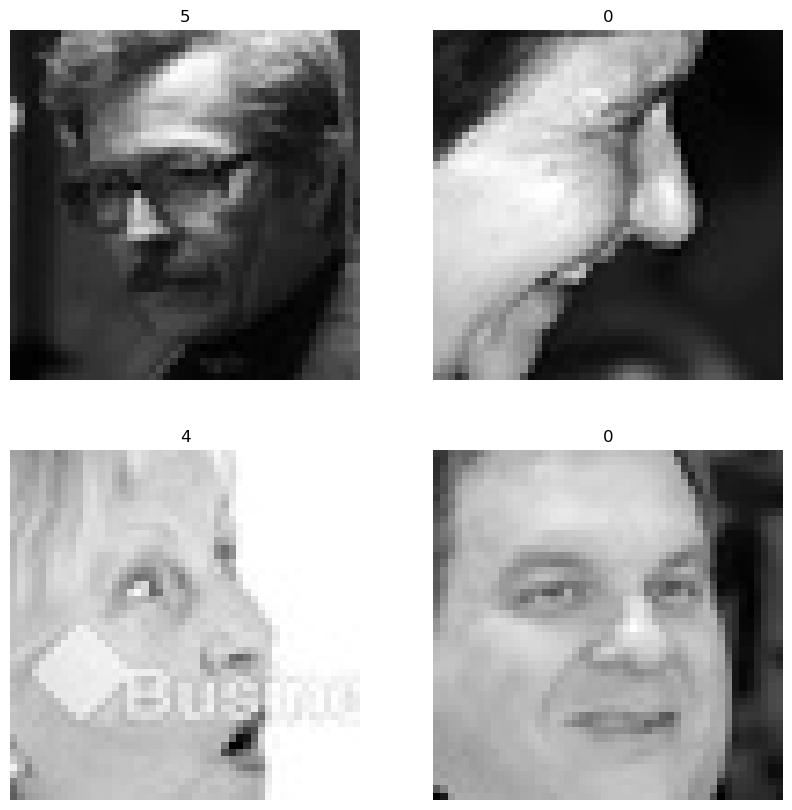

In [28]:
displayRandom(data)

In [36]:
# Split the data into training and testing sets
data = data/255

X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.2, random_state=42)

In [43]:
# Define a basic CNN model
model = models.Sequential([
    layers.Conv2D(64, (3, 3), activation='relu', input_shape=(48, 48, 1)),
    layers.MaxPooling2D((2, 2)),
    layers.BatchNormalization(),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(32, activation='relu'),
    layers.Dense(7, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [44]:
# Train the model
model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))

Epoch 1/10
721/721 [==============================] - 57s 78ms/step - loss: 1.5515 - accuracy: 0.3963 - val_loss: 1.5222 - val_accuracy: 0.4290
Epoch 2/10
721/721 [==============================] - 55s 76ms/step - loss: 1.2928 - accuracy: 0.5095 - val_loss: 1.2929 - val_accuracy: 0.5006
Epoch 3/10
721/721 [==============================] - 56s 78ms/step - loss: 1.1393 - accuracy: 0.5742 - val_loss: 1.2703 - val_accuracy: 0.5202
Epoch 4/10
721/721 [==============================] - 56s 77ms/step - loss: 0.9792 - accuracy: 0.6390 - val_loss: 1.4462 - val_accuracy: 0.4827
Epoch 5/10
721/721 [==============================] - 56s 77ms/step - loss: 0.8190 - accuracy: 0.6999 - val_loss: 1.3797 - val_accuracy: 0.5037
Epoch 6/10
721/721 [==============================] - 56s 77ms/step - loss: 0.6495 - accuracy: 0.7679 - val_loss: 1.4726 - val_accuracy: 0.5044
Epoch 7/10
721/721 [==============================] - 56s 78ms/step - loss: 0.5071 - accuracy: 0.8207 - val_loss: 1.9643 - val_accuracy:

In [45]:
# Evaluate model performance
y_pred = model.predict(X_test)
y_pred = np.argmax(y_pred, axis=1)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")

181/181 [==============================] - 4s 20ms/step
Accuracy: 0.5091
Precision: 0.5145
Recall: 0.5091
F1 Score: 0.5053
